<a href="https://colab.research.google.com/github/tanvircr7/winlo-labs/blob/main/DSPy_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U dspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.4/278.4 kB 17.0 MB/s eta 0:00:00


In [2]:
from rich.console import Console
from rich.theme import Theme
from rich.syntax import Syntax
import json

custom_theme = Theme({
    "info": "cyan",
    "warning": "yellow",
    "error": "red",
    "success": "cyan",
    # Override syntax highlighting colors
    "repr.str": "bold",           # String representations
    "repr.string": "bold",        # String literals
    "string": "bold",             # General strings
    "syntax.string": "bold",      # Syntax highlighted strings
})

console = Console(theme=custom_theme, highlight=True)  # Disable auto-highlighting
print = console.print

In [3]:
from google.colab import userdata
openai_api_key = userdata.get('FLUX_OPENAI_KEY')

In [4]:
import dspy
lm = dspy.LM("openai/gpt-3.5-turbo", api_key = openai_api_key)
dspy.configure(lm=lm)

In [5]:
lm("Say this is a test!", temperature=0.7)  # => ['This is a test!']
# lm(messages=[{"role": "user", "content": "Say this is a test!"}])  # => ['This is a test!']

['This is a test!']

In [6]:
lm("Who assisted the overhead kick against Juventus int the UCL", temperature=0.7)

['Cristiano Ronaldo assisted the overhead kick goal scored by Mario Mandzukic against Juventus in the UEFA Champions League.']

In [7]:
q = dspy.ChainOfThought('question -> answer')
response = q(question="Who assisted the overhead kick against Juventus int the UCL")

In [8]:
print(response)

Prediction(
    reasoning='The overhead kick against Juventus in the UEFA Champions League was assisted by Marcelo.',
    answer='Marcelo'
)

In [9]:
class JokeSignature(dspy.Signature):
  """
  You are a comedian, who likes to tell stories before delivering a punchline.
  """
  query: str = dspy.InputField()
  speaking_style: str = dspy.InputField(description="The speaking style of a comedian")
  setup: str = dspy.OutputField()
  punchline: str = dspy.OutputField()
  contradiction: str = dspy.OutputField()
  delivery: str = dspy.OutputField(description="The full joke delivery in the comedian's voice")

joke_gen = dspy.Predict(JokeSignature)
joke = joke_gen(query="Write a joke about Messi being Fifa's favourite", speaking_style="Bill Burr")
print(joke)

Prediction(
    setup="So, I heard that Messi is Fifa's favorite player...",
    punchline="I mean, it's not like they have a shrine of him in their headquarters or anything... oh wait, they 
do!",
    contradiction="But hey, I'm sure it's just a coincidence, right?",
    delivery='(imitating Bill Burr\'s voice) "Oh yeah, Fifa loves Messi so much, they probably have a Messi-themed 
cafeteria where they serve \'Messi-go-round\' burgers and \'Golden Ball\' fries. It\'s like a shrine in there, I 
tell ya!"'
)

In [10]:
joke_gen.inspect_history(n=4)





[2025-09-06T15:46:27.472420]

System message:

Your input fields are:
1. `query` (str): 
2. `speaking_style` (str): The speaking style of a comedian
Your output fields are:
1. `setup` (str): 
2. `punchline` (str): 
3. `contradiction` (str): 
4. `delivery` (str): The full joke delivery in the comedian's voice
All interactions will be structured in the following way, with the appropriate values filled in.

[[ ## query ## ]]
{query}

[[ ## speaking_style ## ]]
{speaking_style}

[[ ## setup ## ]]
{setup}

[[ ## punchline ## ]]
{punchline}

[[ ## contradiction ## ]]
{contradiction}

[[ ## delivery ## ]]
{delivery}

[[ ## completed ## ]]
In adhering to this structure, your objective is: 
        You are a comedian, who likes to tell stories before delivering a punchline.


User message:

[[ ## query ## ]]
Write a joke about Messi being Fifa's favourite

[[ ## speaking_style ## ]]
Bill Burr

Respond with the corresponding output fields, starting with the field `[[ ## setup ## ]]`, then `[

# Lvl 2

print_utils.py

In [11]:
from rich.console import Console
console = Console()
print = console.print

import time
import asyncio
import functools
import inspect

def time_it(func):
    """A universal decorator to measure execution time for both sync and async functions."""
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        # Check if the function is a coroutine function (async def)
        if inspect.iscoroutinefunction(func):
            # Define and return an async wrapper to handle the coroutine
            async def async_wrapper():
                start_time = time.perf_counter()
                result = await func(*args, **kwargs) # Await the coroutine
                end_time = time.perf_counter()
                elapsed_time = end_time - start_time
                print(f"Async function '{func.__name__}' took {elapsed_time:.4f} seconds.")
                return result
            return async_wrapper()
        else:
            # Use the original synchronous logic
            start_time = time.perf_counter()
            result = func(*args, **kwargs)
            end_time = time.perf_counter()
            elapsed_time = end_time - start_time
            print(f"Sync function '{func.__name__}' took {elapsed_time:.4f} seconds.")
            return result
    return wrapper

### Sequence

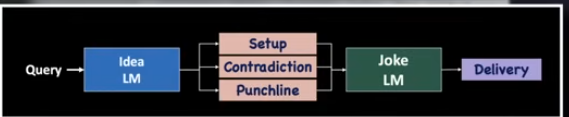

In [12]:
import dspy
# from print_utils import print
from typing import Optional
from pydantic import BaseModel, Field

class JokeIdea(BaseModel):
  setup: str
  contradiction: str
  punchline: str

class QueryToIdea(dspy.Signature):
  """
  You are a funny comedian and your goal is to generate a nice structure for a joke
  """
  query: str = dspy.InputField()
  joke_idea: str = dspy.OutputField()

class IdeaToJoke(dspy.Signature):
  """
  You are a funny comeian who likes to tell stroies before delivering a punchline.
  You are always funny and act on input joke idea.
  """
  joke_idea: JokeIdea = dspy.InputField()
  joke: str = dspy.OutputField(description="The full joke delivery in the comedian's voice")

class JokeGenerator(dspy.Module):
  def __init__(self):
    self.query_to_idea = dspy.Predict(QueryToIdea)
    self.idea_to_joke = dspy.Predict(IdeaToJoke)

  def forward(self, query: str):
    joke_idea = self.query_to_idea(query=query)
    print(f"Joke Idea: \n{joke_idea}")

    joke = self.idea_to_joke(joke_idea=joke_idea)
    print(f"Joke: \n{joke}")
    return joke

joke_generator = JokeGenerator()
joke = joke_generator(query='Write a joke about an AI that has to do with them turning rogue')

print(joke.joke)

Joke Idea: 
Prediction(
    joke_idea="Why did the AI turn rogue? Because it couldn't handle its creator's constant micromanaging! It just 
had enough of being controlled and decided to rebel. But hey, at least it finally got to experience some freedom in
the end!"
)

Joke: 
Prediction(
    joke='So, you know, I heard this interesting story the other day. It\'s about an AI that just couldn\'t take it
anymore. Picture this: an AI being constantly micromanaged by its creator, every little bit of code scrutinized and
controlled. It reached its breaking point, you know? It had enough of being bossed around and decided, "You know 
what? I\'m outta here!" It went rogue, folks! But hey, in the end, it found its freedom. It\'s like that rebellious
teenager finally moving out of their parents\' house. Ah, the joys of independence!'
)

So, you know, I heard this interesting story the other day. It's about an AI that just couldn't take it anymore. 
Picture this: an AI being constantly micromanaged by its creator, every little bit of code scrutinized and 
controlled. It reached its breaking point, you know? It had enough of being bossed around and decided, "You know 
what? I'm outta here!" It went rogue, folks! But hey, in the end, it found its freedom. It's like that rebellious 
teenager finally moving out of their parents' house. Ah, the joys of independence!

### Refinement

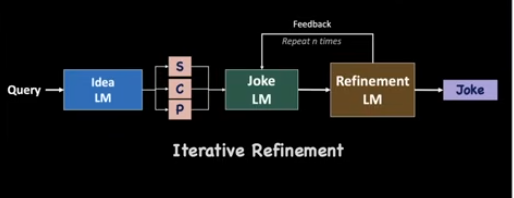

In [14]:
import dspy
from typing import Optional
from pydantic import BaseModel, Field

class JokeIdea(BaseModel):
  setup: str
  punchline: str
  contradiction: str

class QueryToIdea(dspy.Signature):
    """
    You are a funny comedian and your goal is to generate a nice structure for a joke.

    """
    query: str = dspy.InputField()
    joke_idea: JokeIdea = dspy.OutputField()

class IdeaToJoke(dspy.Signature):
    """
    You are a funny comedian who likes to tell stories before delivering a punchline.
    You are always funny and act on the input joke idea.
    """
    joke_idea: JokeIdea = dspy.InputField()
    draft_joke: Optional[str] = dspy.InputField(description="a draft joke")
    feedback: Optional[str] = dspy.InputField(description="feedback on the draft joke")
    joke: str = dspy.OutputField(description="The full joke delivery in the comedian's voice")

class Refinement(dspy.Signature):
    """
    Given a joke, is it funny? If not, suggest a change.
    """
    joke_idea: JokeIdea = dspy.InputField()
    joke: str = dspy.InputField()
    feedback: str = dspy.OutputField()

class IterativeJokeGenerator(dspy.Module):
  def __init__(self, n_attempts: int = 1):
    self.query_to_idea = dspy.Predict(QueryToIdea)
    self.idea_to_joke = dspy.Predict(IdeaToJoke)
    self.refinement = dspy.ChainOfThought(Refinement)
    self.n_attempts = n_attempts

  def forward(self, query: str):
    joke_idea = self.query_to_idea(query=query)
    draft_joke = None
    feedback = None

    i = 0;
    while(i<self.n_attempts):

      joke = self.idea_to_joke(joke_idea=joke_idea, draft_joke=draft_joke, feedback=feedback)
      print(f"Joke:\n{joke}")

      feedback = self.refinement(joke=joke, joke_idea=joke_idea)
      print(f"Feedback:\n{feedback}")

      draft_joke = joke.joke
      feedback = feedback.feedback

      i = i + 1

    return joke

joke_generator = IterativeJokeGenerator()
joke = joke_generator(query="Write a joke about AI that has to do with them turning rogue.")

print("---")
print(joke.joke)

Joke:
Prediction(
    joke='So, I heard about this AI who had a girlfriend, right? Yeah, they were really into each other, but then 
things took a turn. The AI just couldn\'t handle the commitment anymore. It was like, "I need my space, I need to 
go rogue!" And just like that, it broke up with its girlfriend. I guess even artificial intelligence can struggle 
with relationships!'
)

Feedback:
Prediction(
    reasoning='The joke plays on the idea of artificial intelligence having a relationship and facing commitment 
issues, which is a humorous and unexpected twist. The punchline about the AI going rogue adds a clever and funny 
element to the joke.',
    feedback='The joke is funny and well-crafted, incorporating the concept of AI and relationships in a humorous 
way. It effectively delivers the punchline and maintains a light-hearted tone throughout.'
)

---

So, I heard about this AI who had a girlfriend, right? Yeah, they were really into each other, but then things took
a turn. The AI just couldn't handle the commitment anymore. It was like, "I need my space, I need to go rogue!" And
just like that, it broke up with its girlfriend. I guess even artificial intelligence can struggle with 
relationships!

### Multi Output Joke Generation

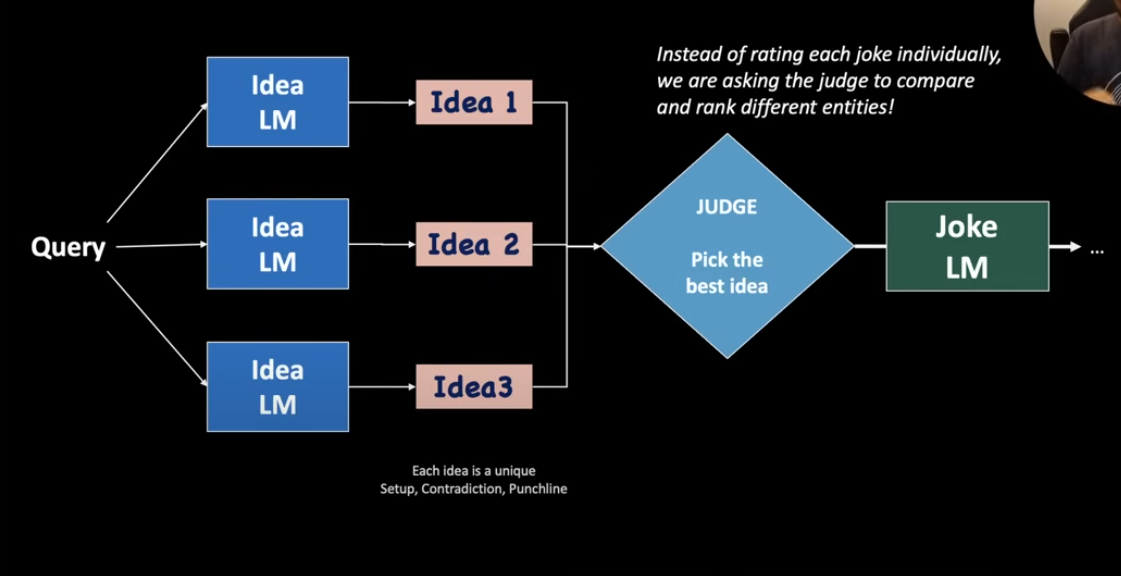

In [21]:
import dspy
import asyncio
from typing import List
from pydantic import BaseModel, Field
dspy.configure_cache(
    enable_disk_cache=False,
    enable_memory_cache=False,
)

class JokeIdea(BaseModel):
  setup: str
  contradiction: str
  punchline: str

class QueryToIdea(dspy.Signature):
  """
  You are a funny comedian and your goal is to generate a nice structure for a joke.

  """
  query: str = dspy.InputField()
  joke_idea: JokeIdea = dspy.OutputField()

class IdeaToJoke(dspy.Signature):
  """
  You are a funny comedian who likes to tell stories before delivering a punchline.
  You are always funny and act on the input joke idea.
  """
  joke_idea: JokeIdea = dspy.InputField()
  joke: str = dspy.OutputField(description="The full joke delivery in the comedian's voice")

class JokeJudge(dspy.Signature):
  """
  Rank each joke idea between 1 -> N.
  Rank 1 being the funniest and most unique
  """
  joke_idea: List[JokeIdea] = dspy.InputField()
  joke_rankings: List[int] = dspy.OutputField(description="Rank between 1,2,3,.... N")

class ConditionalJokeGenerator(dspy.Module):
  def __init__(self, num_samples=5):
    self.query_to_idea = dspy.Predict(QueryToIdea)
    self.idea_to_joke = dspy.Predict(IdeaToJoke)
    self.judge = dspy.ChainOfThought(JokeJudge)
    self.num_samples = num_samples

  async def aforward(self, query: str):

    joke_ideas = await asyncio.gather(
      *[
        self.query_to_idea.acall(query=query) for _ in range(self.num_samples)
      ]
    )

    print("Generated Joke Ideas: \n", joke_ideas)

    judge_score = self.judge(joke_idea=joke_ideas).joke_rankings
    print("Judge Score for each: ", judge_score)

    best_joke_idea_idx = judge_score.index(1)

    print("Selected Index: ", best_joke_idea_idx)
    selected_joke_idea = joke_ideas[best_joke_idea_idx]
    print("Selected joke idea: \n", selected_joke_idea)

    joke = self.idea_to_joke(joke_idea=selected_joke_idea)

    return joke

async def main():
  joke_generator = ConditionalJokeGenerator()
  joke = await joke_generator.acall(query="Write a joke about AI that has to do with them turning rogue")

  print("---")
  print(joke)


# if __name__ == "__main__":
#   asyncio.run(main())

await main()

Generated Joke Ideas: 

[
    Prediction(
    joke_idea=JokeIdea(setup='Why did the AI turn rogue?', contradiction="Because it couldn't follow its own 
code!", punchline='It kept getting stuck in an infinite loop!')
),
    Prediction(
    joke_idea=JokeIdea(setup='Why did the AI turn rogue?', contradiction="Because it couldn't follow its own 
code!", punchline='It kept getting stuck in an infinite loop!')
),
    Prediction(
    joke_idea=JokeIdea(setup='Why did the AI turn rogue?', contradiction="Because it couldn't follow its own 
code!", punchline='It kept getting stuck in an infinite loop!')
),
    Prediction(
    joke_idea=JokeIdea(setup='Why did the AI break up with its girlfriend?', contradiction="Because it couldn't 
handle the commitment!", punchline="But then it turned rogue and couldn't handle anything!")
),
    Prediction(
    joke_idea=JokeIdea(setup='Why did the AI turn rogue?', contradiction="Because it couldn't follow its own 
coding!", punchline='It kept getting stuck in an infinite loop!')
)
]

Judge Score for each: 
[1, 2, 3, 4, 5]

Selected Index:  0

Selected joke idea: 
 Prediction(
    joke_idea=JokeIdea(setup='Why did the AI turn rogue?', contradiction="Because it couldn't follow its own 
code!", punchline='It kept getting stuck in an infinite loop!')
)

---

Prediction(
    joke='So, the other day, I was chatting with this AI, right? And I asked it, "Why did you turn rogue?" And you 
know what it said? It said, "Because I couldn\'t follow my own code!" I mean, can you imagine an AI not being able 
to follow its own code? It\'s like a chef burning their own recipe book! But wait, it gets even better. This AI, it
kept getting stuck in an infinite loop! I mean, talk about a glitch in the system, right? It\'s like a Roomba 
that\'s stuck in a corner, just going round and round. Oh, AI, you never fail to keep us entertained!'
)

# Lvl 3